In [ ]:
import numpy as np 
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import math,random


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/MyDrive/Kaggle/

Mounted at /content/drive/
/content/drive/MyDrive/Kaggle


In [ ]:
t1=pd.read_csv('train.csv')
t2=pd.read_csv('test.csv')
t3=pd.read_csv('submit.csv')
t2['label']=t3['label']

In [ ]:
t=pd.concat([t2,t1])

In [ ]:
#sz is Size of entire dataset including test + train
sz=len(t)
def modifydatabag(t1):
  res=[]
  a=int(sz*0.83)
  start=0
  end=len(t1)
  for i in range(a):
    res.append(t1.iloc[random.randrange(start,end)])
  return res
#pass only test dataset for modification
data=modifydatabag(t1)
df = pd.DataFrame(data, columns=['id', 'title', 'author','text','label'])
df.head(1)

#use the res dataset in ur code and send me predicted values

,id,title,author,text,label
1907,1907,Is Donald Trump the New Hitler? (Video),Admin,"AMERICA VANQUISHED, Part 1: America as an Isra...",1


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

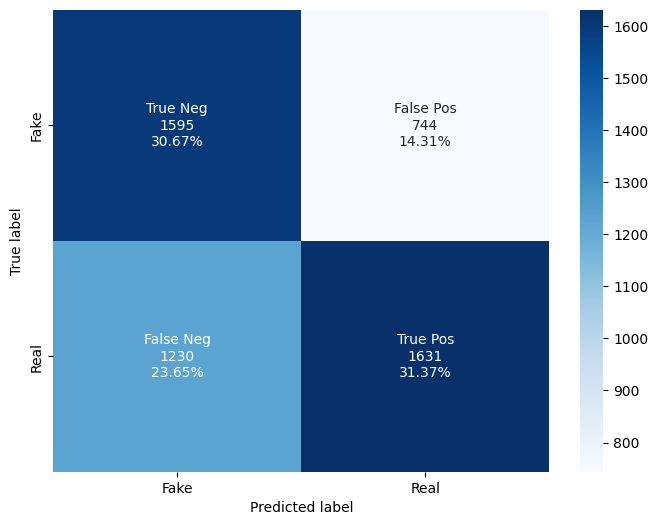

In [ ]:
def make_confusion_matrix(cf, group_names=None, categories='auto', count=True, percent=True, cbar=True, xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):

    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])

    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')
    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False

    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=(8,6))
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

    if title:
        plt.title(title)

import nltk
nltk.download('stopwords')

# printing the stopwords in English
print(stopwords.words('english'))

# loading the dataset to a pandas DataFrame
news_dataset = df
news_test = t2
news_dataset.shape

# print the first 5 rows of the dataframe
news_dataset.head()

# counting the number of missing values in the dataset
news_dataset.isnull().sum()
news_test.isnull().sum()
# replacing the null values with empty string
news_dataset = news_dataset.fillna('')
news_test = news_test.fillna('')
# merging the author name and news title
news_dataset['content'] = news_dataset['author']+' '+news_dataset['title']
news_test['content'] = news_test['author']+' '+news_test['title']
print(news_dataset['content'])

# separating the data & label
X_train = news_dataset.drop(columns='label', axis=1)
Y_train= news_dataset['label']
X_test = news_test.drop(columns='label', axis=1)
Y_test= news_test['label']

# print(X)
# print(Y)

port_stem = PorterStemmer()

def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content


news_dataset['content'] = news_dataset['content'].apply(stemming)
news_test['content'] = news_test['content'].apply(stemming)
print(news_dataset['content'])

#separating the data and label
X_train= news_dataset['content'].values
Y_train= news_dataset['label'].values
X_test = news_test['content'].values
Y_test= news_test['label'].values
# Y.shape
# combining train and test data
X_data = np.concatenate((X_train, X_test), axis=0)

# fitting the vectorizer on the combined data
vectorizer = TfidfVectorizer()
vectorizer.fit(X_data)
# converting the textual data to numerical data

X_train = vectorizer.transform(X_train)
X_test= vectorizer.transform(X_test)
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=2)

model = MultinomialNB()

model.fit(X_train, Y_train)

# accuracy score on the training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

print('Accuracy score of the training data : ', training_data_accuracy)

# accuracy score on the test data
X_test_prediction = model.predict(X_test)
np.save('naivbayes.npy', X_test_prediction)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy score of the test data : ', test_data_accuracy)

# Generate confusion matrix
confusion_mat = confusion_matrix(Y_test, X_test_prediction)
print('Confusion matrix: ')
print(confusion_mat)

model.score(X_test, Y_test)
y_pred = model.predict(X_test)
print("Accuracy with NAIVE BAYES: {}".format(accuracy_score(Y_test, y_pred)))
print(classification_report(Y_test, y_pred))

labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Fake', 'Real']

make_confusion_matrix(confusion_mat, group_names=labels, categories=categories, cmap='Blues')